# [Get Started with Computer Vision by Building a Digit Recognition Model with Tensorflow](https://medium.com/artificialis/get-started-with-computer-vision-by-building-a-digit-recognition-model-with-tensorflow-b2216823b90a)

In [14]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [15]:
# Check how many examples do we have in our train and test sets
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")

We have 60000 images in the training set and 10000 images in the test set.


In [16]:
# Let's see the first sample of our training set
X_train[0].shape

(28, 28)

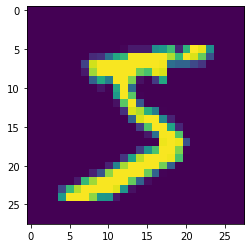

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

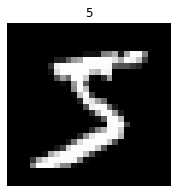

In [18]:

plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

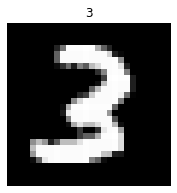

In [19]:
import random
random_image = random.randint(0,  len(X_train))

plt.figure(figsize=(3, 3))
plt.imshow(X_train[random_image], cmap="gray")

plt.title(y_train[random_image])
plt.axis(False);

In [20]:

X_train.shape
# Output: (60000, 28, 28)

(60000, 28, 28)

In [21]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))

X_train.shape # (60000, 28, 28, 1)

(60000, 28, 28, 1)

In [22]:
X_train = X_train / 255.
X_test = X_test / 255.

In [24]:
import numpy as np

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [25]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
	layers.Conv2D(filters=10,
				kernel_size=3, 
				activation="relu", 
				input_shape=(28,  28,  1)),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Conv2D(10,  3, activation="relu"),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Flatten(),
	layers.Dense(10, activation="softmax")
])

In [26]:
# Check the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

In [27]:
model.compile(loss="sparse_categorical_crossentropy", 
			optimizer=tf.keras.optimizers.Adam(),
			metrics=["accuracy"])

In [28]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2536 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0905 - accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0666 - accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0544 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0471 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0416 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0380 - accuracy: 0.9881
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 10/10
1875/1875 [==============================] - 35s 18m

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0365 - accuracy: 0.9877


[0.036500684916973114, 0.9876999855041504]

In [30]:
model.save("digit-recognizer.h5")

In [33]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '../src/model')